# Lab session 4: 
# Visualising the `esda` Moran Matrix with `splot`

Yu Cheng HSU

Reference: http://pysal.org/notebooks/viz/splot/intro.html

This is a simplified python version of [GeoDa](https://geodacenter.github.io/workbook/6a_local_auto/lab6a.html#conditional-local-cluster-maps)

# splot package

splot connects spatial analysis done in PySAL to different popular visualization toolkits like matplotlib. 

The splot package allows you to create both static plots ready for publication and interactive visualizations for quick iteration and spatial data exploration. 

The primary goal of splot is to enable you to visualize popular PySAL objects and gives you different views on your spatial analysis workflow.


A video to get familar with splot
https://www.youtube.com/watch?v=kriQOJMycIQ&feature=youtu.be&t=2403

Package splot can be used 

1. for creating value-by-alpha maps

2. for assessing the relationship between neighboring polygons

3. for the visualization of space-time autocorrelation, also documented in giddy

4. for visualizing spatial autocorrelation of univariate or multivariate variable analysis.


Installing splot:

$ pip install -U pysal

or 

$ conda install -c conda-forge pysal

In [1]:
from libpysal import examples
import libpysal as lp
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

# Import data

In [2]:
examples.load_example('Guerry')

Example not available: Guerry
Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


## Documentation of the data

In [3]:
examples.explain('Guerry')

## Read the data

In [4]:
data_file=examples.load_example('Guerry')
gdf = gpd.read_file('C:/Users/User/pysal_data/Guerry/guerry/guerry.shp')

In [5]:
gdf

,dept,Region,Dprtmnt,Crm_prs,Crm_prp,Litercy,Donatns,Infants,Suicids,MainCty,...,Infntcd,Dntn_cl,Lottery,Desertn,Instrct,Prsttts,Distanc,Area,Pop1831,geometry
0,1.0,E,Ain,28870.0,15890.0,37.0,5098.0,33120.0,35039.0,2.0,...,60.0,69.0,41.0,55.0,46.0,13.0,218.372,5762.0,346.03,"POLYGON ((801150.000 2092615.000, 800669.000 2..."
1,2.0,N,Aisne,26226.0,5521.0,51.0,8901.0,14572.0,12831.0,2.0,...,82.0,36.0,38.0,82.0,24.0,327.0,65.945,7369.0,513.00,"POLYGON ((729326.000 2521619.000, 729320.000 2..."
2,3.0,C,Allier,26747.0,7925.0,13.0,10973.0,17044.0,114121.0,2.0,...,42.0,76.0,66.0,16.0,85.0,34.0,161.927,7340.0,298.26,"POLYGON ((710830.000 2137350.000, 711746.000 2..."
3,4.0,E,Basses-Alpes,12935.0,7289.0,46.0,2733.0,23018.0,14238.0,1.0,...,12.0,37.0,80.0,32.0,29.0,2.0,351.399,6925.0,155.90,"POLYGON ((882701.000 1920024.000, 882408.000 1..."
4,5.0,E,Hautes-Alpes,17488.0,8174.0,69.0,6962.0,23076.0,16171.0,1.0,...,23.0,64.0,79.0,35.0,7.0,1.0,320.280,5549.0,129.10,"POLYGON ((886504.000 1922890.000, 885733.000 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,85.0,W,Vendee,20827.0,7566.0,28.0,14035.0,62486.0,67963.0,1.0,...,44.0,30.0,68.0,79.0,59.0,4.0,212.459,6720.0,330.36,"MULTIPOLYGON (((243055.000 2197885.000, 243019..."
81,86.0,W,Vienne,15010.0,4710.0,25.0,8922.0,35224.0,21851.0,2.0,...,1.0,44.0,40.0,38.0,65.0,18.0,170.523,6990.0,282.73,"POLYGON ((450395.000 2119945.000, 450065.000 2..."
82,87.0,C,Haute-Vienne,16256.0,6402.0,13.0,13817.0,19940.0,33497.0,2.0,...,6.0,78.0,55.0,11.0,84.0,7.0,198.874,5520.0,285.13,"POLYGON ((515230.000 2049895.000, 514990.000 2..."
83,88.0,E,Vosges,18835.0,9044.0,62.0,4040.0,14978.0,33029.0,2.0,...,34.0,5.0,14.0,85.0,11.0,43.0,174.477,5874.0,397.99,"POLYGON ((951144.000 2383215.000, 953082.000 2..."


# Basic spatial autocorrelation analysis

For this example we will focus on the Donatns (charitable donations per capita) variable. We will calculate Contiguity weights `w` with `libpysals` `Queen.from_dataframe(gdf)`. The reason why we want to investigate this variable is that this variable has certain correlation with population per crime against person Then we transform our weights to be row-standardized.

## Moran's I
Moran’s I was proposed by Moran (1948), and popularized through the classic work on spatial autocorrelation by Cliff and Ord. You can treat the Moran's I as a spatial weighted correlation coefficient

$$
I =\frac{\sum_i\sum_j\ w_{ij}(y_i-\bar{y})(y_j-\bar{y})}{\sum_i(y_i-\bar{y})^2} \\
=\frac{\sum_i\big(z_i\times\sum_jw_{ij}z_j\big)}{\sum_iz_i^2}
$$

Noticed that the $w_{ij}$ is the normalized weight that $\sum_jw_{ij}=1$ 

In [6]:
from libpysal.weights.contiguity import Queen
from splot.libpysal import plot_spatial_weights

In [7]:
x = gdf['Donatns'].values

In [13]:
print(gdf.geometry[0])

POLYGON ((801150 2092615, 800669 2093190, 800688 2095430, 800780 2095795, 800589 2096112, 800333 2097190, 799095 2098505, 799136 2098838, 799690 2100360, 799329 2100395, 797715 2100950, 797655 2101330, 797410 2102850, 797149 2102788, 796755 2102425, 796738 2102785, 796612 2103487, 795234 2103892, 794905 2104515, 794547 2104359, 791555 2102570, 791465 2102760, 791935 2104075, 791835 2105023, 791670 2105295, 790205 2105555, 790035 2105875, 789304 2107116, 788617 2107148, 788005 2106760, 787670 2106708, 786705 2106990, 786350 2107029, 785720 2107335, 785562 2108399, 786670 2109486, 786930 2109775, 787055 2110010, 787208 2110344, 787367 2111056, 786900 2113550, 786795 2114260, 786830 2114370, 786811 2114751, 786384 2116197, 786550 2116940, 786560 2117563, 786465 2117860, 785956 2119206, 787211 2120474, 787415 2120775, 787600 2121475, 787536 2121809, 787137 2122743, 786610 2123110, 786457 2124100, 787138 2124890, 787365 2125160, 787545 2125377, 787880 2125830, 788198 2126745, 788225 2127075

In [9]:
gdf.head().T

,0,1,2,3,4
dept,1,2,3,4,5
Region,E,N,C,E,E
Dprtmnt,Ain,Aisne,Allier,Basses-Alpes,Hautes-Alpes
Crm_prs,28870,26226,26747,12935,17488
Crm_prp,15890,5521,7925,7289,8174
Litercy,37,51,13,46,69
Donatns,5098,8901,10973,2733,6962
Infants,33120,14572,17044,23018,23076
Suicids,35039,12831,114121,14238,16171
MainCty,2,2,2,1,1


<AxesSubplot:>

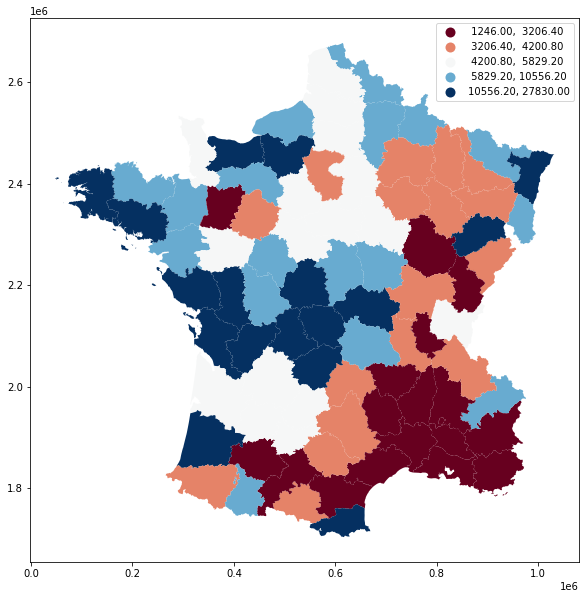

In [10]:
fig, axs = plt.subplots(figsize=(20,10))
gdf.plot(column="Donatns", scheme="quantiles",cmap='RdBu',ax=axs,legend=True)

### Caculating edge weights

In [16]:
w = Queen.from_dataframe(gdf)

In [53]:
w.weights

{0: [0.25, 0.25, 0.25, 0.25],
 1: [0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666],
 2: [0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666],
 3: [0.25, 0.25, 0.25, 0.25],
 4: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 5: [0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285],
 6: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 7: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 8: [0.2, 0.2, 0.2, 0.2, 0.2],
 9: [0.2, 0.2, 0.2, 0.2, 0.2],
 10: [0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285],
 11: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

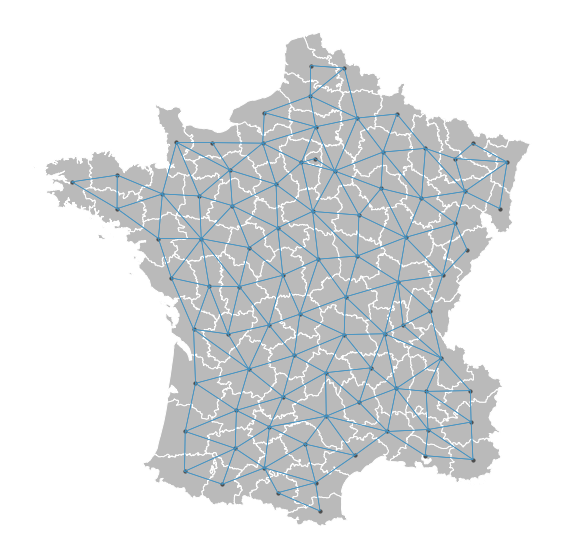

In [17]:
plot_spatial_weights(w,gdf)

### Calculate Moran's I correlation

In [19]:
from esda.moran import Moran, Moran_Local
from splot.esda import moran_scatterplot, plot_moran

moran = Moran(x,w)
print("Moran's I",moran.I)

Moran's I 0.3533613255848606


## Plotting local clusters through LISA
LISA, local indicator of spatial association, We used this clustering method to identify and plot the local cluster in the data. LISA is the local Moran I for the observation

In [21]:
moran_loc = Moran_Local(x, w)

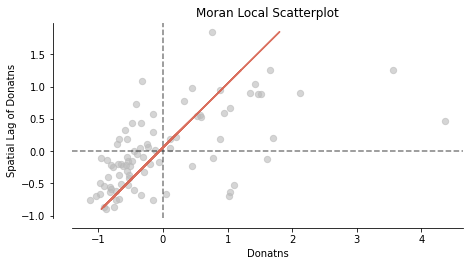

In [22]:
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()

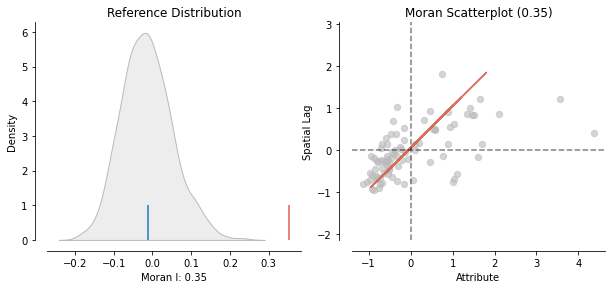

In [25]:
plot_moran(moran, figsize=(10,4))
plt.show()

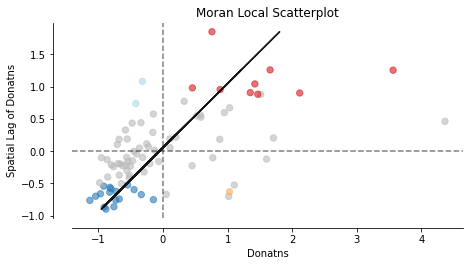

In [26]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()

We can distinguish the specific type of local spatial autocorrelation in High-High, Low-Low, High-Low, Low-High. Where the upper right quadrant displays HH, the lower left, LL, the upper left LH and the lower left HL.

These types of local spatial autocorrelation describe similarities or dissimilarities between a specific polygon with its neighboring polygons.

- The upper left quadrant for example indicates that polygons with low values are surrounded by polygons with high values (LH).

- The lower right quadrant shows polygons with high values surrounded by neighbors with low values (HL).

This indicates an association of dissimilar values.

Let's now visualize the areas we found to be significant on a map:


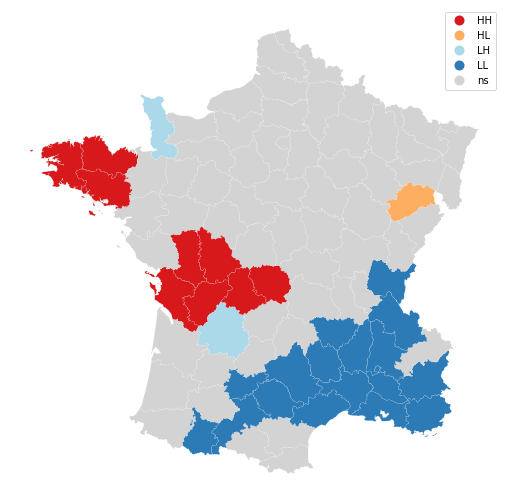

In [30]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05, figsize = (9,9)) # pvalue
plt.show()

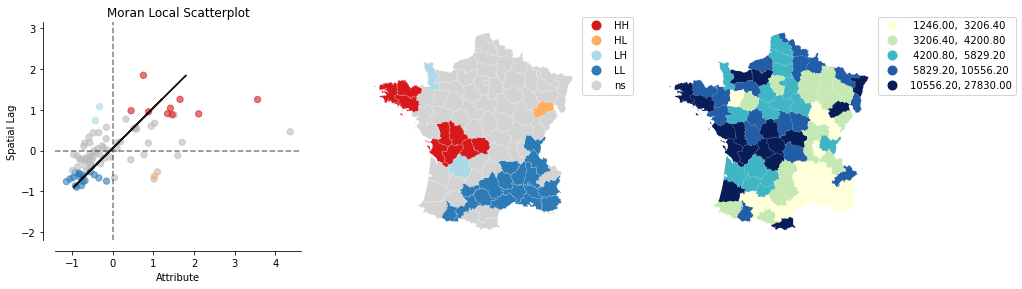

In [31]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc,gdf,'Donatns')
plt.show()

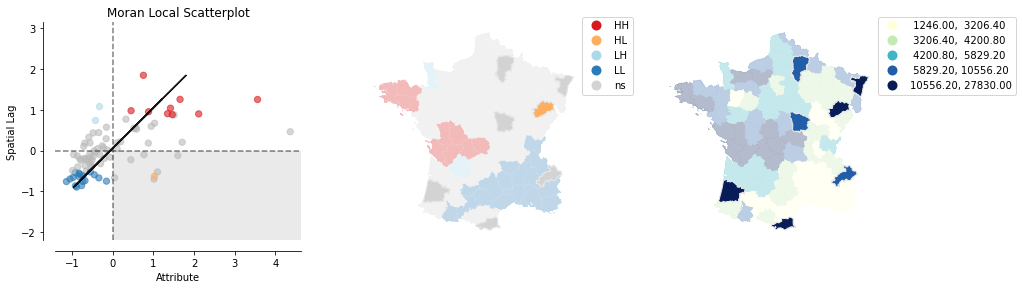

In [35]:
plot_local_autocorrelation(moran_loc,gdf,'Donatns',quadrant=4)
# quadrant highlight the part in the graph
plt.show()

## Bivariate Moran and Bivariate local Moran 

Similar to univariate local Moran statistics `pysal` and `splot` offer tools to asses local autocorrelation for bivariate analysis:

Similar to univariate case, bivariate  Global Moran's I and local Moran's I are defined as below.
the bivariate Moran’s I 
$$
I^B 
=\frac{\sum_i\big(x_i\times\sum_jw_{ij}y_j\big)}{\sum_ix_i^2}
$$
the bivariate Local Moran’s I 
$$
I^B_i 
=\frac{x_i\times\sum_jw_{ij}y_j}{\sum_ix_i^2}
$$

In [36]:
from esda.moran import Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv

In [37]:
y = gdf['Crm_prs'].values

<AxesSubplot:>

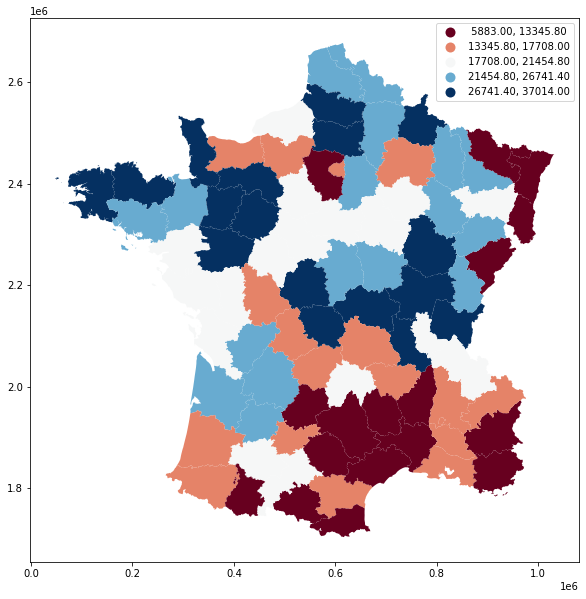

In [38]:
fig, axs = plt.subplots( figsize=(20,10))
gdf.plot(column="Crm_prs", scheme="quantiles",cmap='RdBu',ax=axs,legend=True)

In [39]:
moran = Moran(y,w)
moran_bv = Moran_BV(y,x,w)
moran_loc = Moran_Local(y,w)
moran_loc_bv = Moran_Local_BV(y,x,w)

In [40]:
moran_loc.Is

array([ 5.16120231e-01,  8.18275138e-01,  7.94086560e-01,  7.33161543e-01,
        2.28467334e-01,  8.29040272e-01,  6.15280448e-01,  1.62741545e+00,
       -1.95256251e-02,  6.87081885e-01,  1.70789658e+00,  8.21748275e-01,
       -2.13568315e-01,  2.91316827e-01, -1.84833414e-01, -4.71986129e-02,
        2.49972417e-01,  5.44111950e-02,  8.62095943e-01,  8.35368441e-01,
        5.38432168e-01, -5.04462416e-02, -6.81022658e-01,  6.78851849e-01,
       -1.05369231e-01,  3.85679224e-02,  1.11623658e+00,  1.16813886e+00,
        1.62030880e-01,  6.90372249e-02,  2.15223594e-02,  1.00025530e+00,
        2.76308094e-01,  4.23159405e-01, -1.01271972e-01,  1.56473320e-02,
        5.54846307e-01, -2.75844170e-02,  1.11200075e-01, -8.29944024e-02,
        2.81817532e-01, -4.89624430e-02, -1.58391444e-02,  8.30286100e-01,
       -1.60743989e-01,  1.59760748e+00,  3.96712769e-01,  8.62342357e-01,
       -4.66396879e-01,  2.62343383e-01,  1.42473872e+00, -3.79247703e-01,
        3.88066026e-01,  

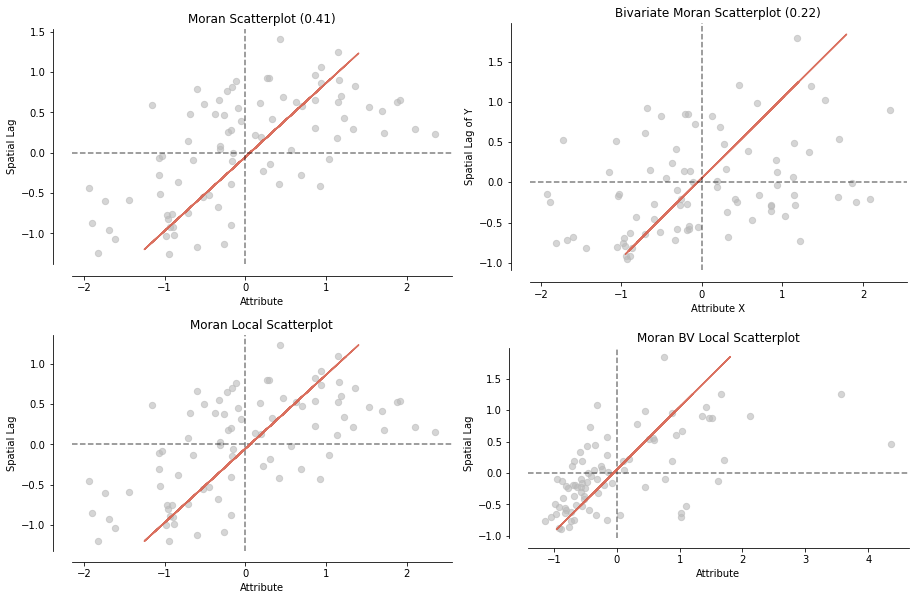

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(15,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, ax=axs[1,1])
plt.show()

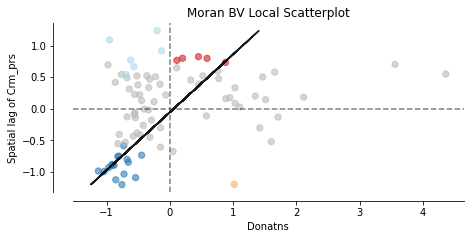

In [46]:
moran_loc_bv = Moran_Local_BV(x,y,w)
fig, ax = moran_scatterplot(moran_loc_bv, p=0.05)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial lag of Crm_prs')
plt.show()

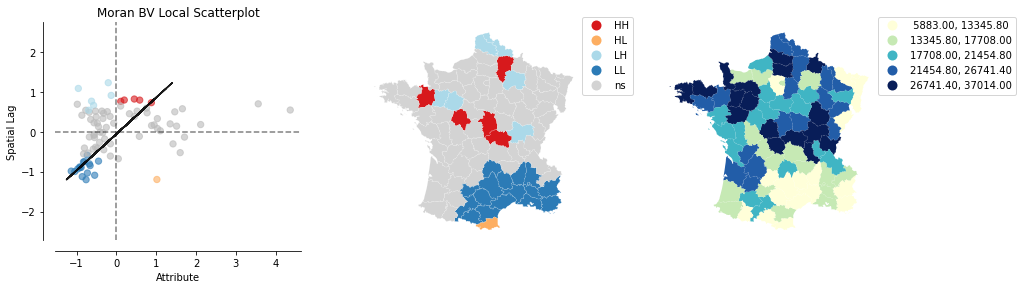

In [51]:
plot_local_autocorrelation(moran_loc_bv, gdf, 'Crm_prs')
plt.show()

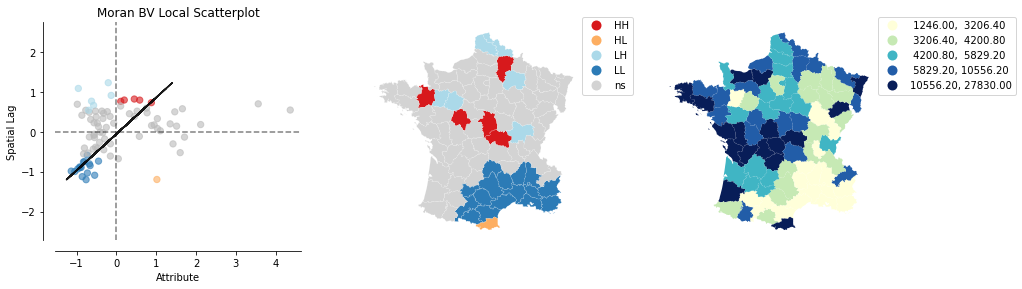

In [52]:
plot_local_autocorrelation(moran_loc_bv, gdf, 'Donatns')
plt.show()